In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# 데이터 드라이브에 업로드해야함.
df = pd.read_excel('/content/drive/MyDrive/유사도 모델/데이터정제_데이터임베딩_토크나이저 변경_231114.xlsx')

In [ ]:
X_data = df[['플랫폼', '검색어(뉴스,증권뉴스등)', '게시물제목', '게시물내용', '뉴스제목', '뉴스내용_불용어처리', '게시물등록일']] # 여러 항목 가져올때는 [[]] 2개 필요함.
y_data = df[['similarity']]

print('피처데이터 개수 : {}'.format(len(X_data)))
print('타겟데이터 개수 : {}'.format(len(y_data)))

피처데이터 개수 : 4150
타겟데이터 개수 : 4150


In [ ]:
# 총 4510개의 데이터에 대해서 유사한 데이터와 유사하지 않은 데이터의 개수 확인
print(df.groupby('similarity').size().reset_index(name='count'))

   similarity  count
0           0   2622
1           1   1528


In [ ]:
# 입력 데이터에 대해 정규화 진행 - 훈련하는 동안 발생할 수 있는 수치적 불안정성 방지

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_data = scaler.fit_transform(X_data)

In [ ]:
# 학습 데이터/ 테스트 데이터 분류
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=33)

In [ ]:
# 오버 샘플링

from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state = 33)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
print("전체 데이터 개수 : ", len(X_data))
print("훈련 데이터 x 개수 : ", len(X_train_over))
print("훈련 데이터 y 개수 : ", len(y_train_over))
print("테스트 데이터 개수 : ", len(X_test))

전체 데이터 개수 :  4150
훈련 데이터 x 개수 :  4188
훈련 데이터 y 개수 :  4188
테스트 데이터 개수 :  830


In [ ]:
# 레이블이 고르게 분포되었는지 확인
print('훈련 데이터 비율')
print(f'유사한 데이터의 비율 = {round(y_train_over.value_counts()[1]/len(y_train) * 100, 3)}%')
print(f'유사하지 않은 데이터의 비율 = {round(y_train_over.value_counts()[0]/len(y_train) * 100, 3)}%')


print()
print('테스트 데이터 비율')
print(f'유사한 데이터의 비율 = {round(y_test.value_counts()[1]/len(y_test) * 100, 3)}%')
print(f'유사하지 않은 데이터의 비율 = {round(y_test.value_counts()[0]/len(y_test) * 100, 3)}%')

훈련 데이터 비율
유사한 데이터의 비율 = 63.072%
유사하지 않은 데이터의 비율 = 63.072%

테스트 데이터 비율
유사한 데이터의 비율 = 36.386%
유사하지 않은 데이터의 비율 = 63.614%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## LSTM에서 학습용 입력 데이터는 3차원 배열 구조를 가져야 하므로 3차원으로 변경시켜줘야 함.
# 3차원 입력 데이터 생성 [samples, time steps, features]
import numpy as np

X_train_over = np.reshape(np.array(X_train_over), (X_train_over.shape[0], 1, X_train_over.shape[1]))
X_test = np.reshape(np.array(X_test), (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# CNN 모델

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(rate=0.10))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(rate=0.10))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(rate=0.10))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error' ,metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_over, y_train_over, epochs=50, batch_size=128, verbose=1)

Epoch 1/50
33/33 [==============================] - 2s 7ms/step - loss: 0.2247 - accuracy: 0.7486
Epoch 2/50
33/33 [==============================] - 0s 7ms/step - loss: 0.1378 - accuracy: 0.8386
Epoch 3/50
33/33 [==============================] - 0s 6ms/step - loss: 0.1309 - accuracy: 0.8434
Epoch 4/50
33/33 [==============================] - 0s 6ms/step - loss: 0.1294 - accuracy: 0.8436
Epoch 5/50
33/33 [==============================] - 0s 6ms/step - loss: 0.1269 - accuracy: 0.8450
Epoch 6/50
33/33 [==============================] - 0s 6ms/step - loss: 0.1272 - accuracy: 0.8431
Epoch 7/50
33/33 [==============================] - 0s 6ms/step - loss: 0.1240 - accuracy: 0.8467
Epoch 8/50
33/33 [==============================] - 0s 7ms/step - loss: 0.1266 - accuracy: 0.8441
Epoch 9/50
33/33 [==============================] - 0s 7ms/step - loss: 0.1230 - accuracy: 0.8462
Epoch 10/50
33/33 [==============================] - 0s 6ms/step - loss: 0.1203 - accuracy: 0.8505
Epoch 11/50
33/33 [

In [ ]:
y_pred = model.predict(X_test)

26/26 [==============================] - 0s 2ms/step


In [ ]:
# val data로 분리해서 val에 대해 적
preds_1d = y_pred.flatten() # 차원 펴주기
pred_class = np.where(preds_1d >= 0.2, 1 , 0) #0.2보다크면 1, 작으면 0

'''모델 평가'''
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, pred_class))

26/26 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.71      0.82       528
           1       0.65      0.94      0.77       302

    accuracy                           0.80       830
   macro avg       0.81      0.83      0.80       830
weighted avg       0.85      0.80      0.80       830



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score

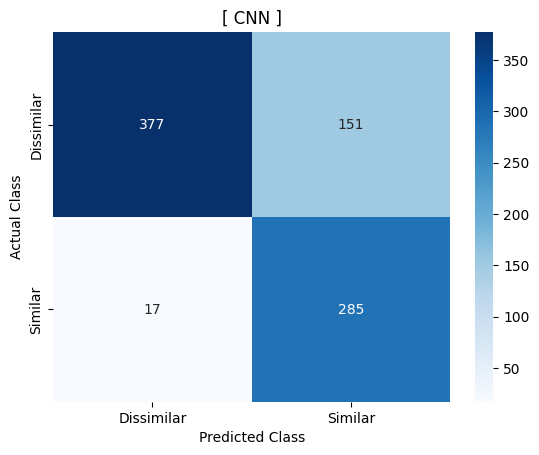

In [ ]:
y_pred[y_pred>=0.2] = 1
y_pred[y_pred<0.2] = 0

sns.heatmap(confusion_matrix(y_test, y_pred),cmap='Blues',annot=True,fmt='.5g',
            xticklabels=['Dissimilar','Similar'],yticklabels=['Dissimilar','Similar'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('[ CNN ]')
plt.show()

In [ ]:
# LSTM 모델

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(1, 7)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error',  metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train_over, y_train_over, epochs=50, batch_size=128, verbose=1)

Epoch 1/50
33/33 [==============================] - 3s 5ms/step - loss: 0.4632 - accuracy: 0.5000
Epoch 2/50
33/33 [==============================] - 0s 5ms/step - loss: 0.3780 - accuracy: 0.5000
Epoch 3/50
33/33 [==============================] - 0s 5ms/step - loss: 0.2899 - accuracy: 0.4850
Epoch 4/50
33/33 [==============================] - 0s 5ms/step - loss: 0.2475 - accuracy: 0.5482
Epoch 5/50
33/33 [==============================] - 0s 5ms/step - loss: 0.2126 - accuracy: 0.6698
Epoch 6/50
33/33 [==============================] - 0s 5ms/step - loss: 0.1853 - accuracy: 0.7586
Epoch 7/50
33/33 [==============================] - 0s 5ms/step - loss: 0.1699 - accuracy: 0.7999
Epoch 8/50
33/33 [==============================] - 0s 5ms/step - loss: 0.1577 - accuracy: 0.8188
Epoch 9/50
33/33 [==============================] - 0s 5ms/step - loss: 0.1522 - accuracy: 0.8233
Epoch 10/50
33/33 [==============================] - 0s 5ms/step - loss: 0.1463 - accuracy: 0.8343
Epoch 11/50
33/33 [

In [ ]:
y_pred = model.predict(X_test)

26/26 [==============================] - 0s 3ms/step


In [ ]:
# val data로 분리해서 val에 대해 적
preds_1d = y_pred.flatten() # 차원 펴주기
pred_class = np.where(preds_1d >= 0.2, 1 , 0) #0.2보다크면 1, 작으면 0

'''모델 평가'''
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, pred_class))

26/26 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       528
           1       0.71      0.91      0.80       302

    accuracy                           0.83       830
   macro avg       0.82      0.85      0.83       830
weighted avg       0.85      0.83      0.83       830



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score

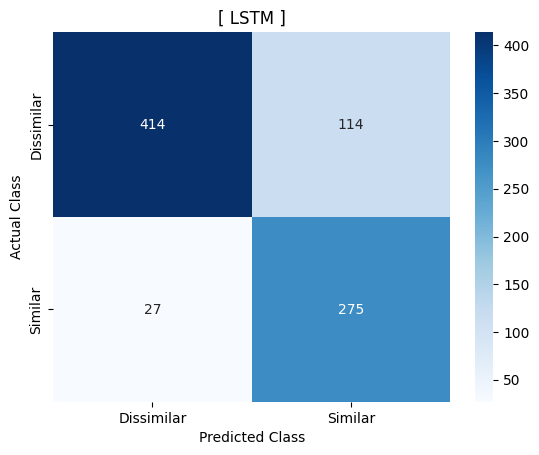

In [ ]:
y_pred[y_pred>=0.2] = 1
y_pred[y_pred<0.2] = 0

sns.heatmap(confusion_matrix(y_test, y_pred),cmap='Blues',annot=True,fmt='.5g',
            xticklabels=['Dissimilar','Similar'],yticklabels=['Dissimilar','Similar'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('[ LSTM ]')
plt.show()

In [ ]:
# RNN 모델

In [ ]:
from keras.layers import Activation, SimpleRNN

model = Sequential()
model.add(SimpleRNN(8))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error' ,metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_over, y_train_over, epochs=50, batch_size=128, verbose=1)

Epoch 1/50
33/33 [==============================] - 1s 2ms/step - loss: 0.2449 - accuracy: 0.6003
Epoch 2/50
33/33 [==============================] - 0s 3ms/step - loss: 0.2138 - accuracy: 0.6526
Epoch 3/50
33/33 [==============================] - 0s 3ms/step - loss: 0.1943 - accuracy: 0.7056
Epoch 4/50
33/33 [==============================] - 0s 3ms/step - loss: 0.1819 - accuracy: 0.7440
Epoch 5/50
33/33 [==============================] - 0s 2ms/step - loss: 0.1736 - accuracy: 0.7818
Epoch 6/50
33/33 [==============================] - 0s 3ms/step - loss: 0.1677 - accuracy: 0.8028
Epoch 7/50
33/33 [==============================] - 0s 3ms/step - loss: 0.1635 - accuracy: 0.8154
Epoch 8/50
33/33 [==============================] - 0s 3ms/step - loss: 0.1600 - accuracy: 0.8202
Epoch 9/50
33/33 [==============================] - 0s 3ms/step - loss: 0.1576 - accuracy: 0.8223
Epoch 10/50
33/33 [==============================] - 0s 3ms/step - loss: 0.1551 - accuracy: 0.8259
Epoch 11/50
33/33 [

In [ ]:
y_pred = model.predict(X_test)

26/26 [==============================] - 0s 2ms/step


In [ ]:
# val data로 분리해서 val에 대해 적
preds_1d = y_pred.flatten() # 차원 펴주기
pred_class = np.where(preds_1d >= 0.2, 1 , 0) #0.2보다크면 1, 작으면 0

'''모델 평가'''
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, pred_class))

26/26 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.50      0.66       528
           1       0.53      0.97      0.68       302

    accuracy                           0.67       830
   macro avg       0.74      0.73      0.67       830
weighted avg       0.80      0.67      0.67       830



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score

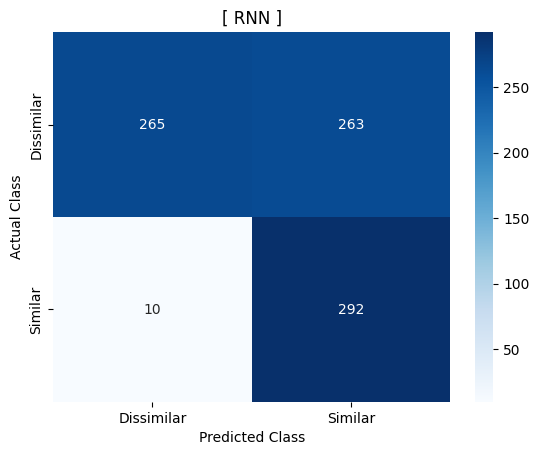

In [ ]:
y_pred[y_pred>=0.2] = 1
y_pred[y_pred<0.2] = 0

sns.heatmap(confusion_matrix(y_test, y_pred),cmap='Blues',annot=True,fmt='.5g',
            xticklabels=['Dissimilar','Similar'],yticklabels=['Dissimilar','Similar'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('[ RNN ]')
plt.show()